# Importações

In [2]:
import pandas as pd 
import numpy as np 
from sklearn.datasets import load_wine

# Dados

In [69]:
data = load_wine()
columns = data.feature_names
X = data.data
y = data.target

In [70]:
X = pd.DataFrame(X, columns=columns)
X

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline  
0                            3.92   1065.0  
1                            3.40   1050.0  
2                            3.17   1185.0  
3                            3.45   1480.0  
4                            2.93    735.0  
..                            ...      ...  
173                          1.74    740.0  
174                          1.56    750.0  
175                          1.56    835.0  
176                          1.62    840.0  
177                          1.60    560.0  

[178 rows x 13 columns]

In [71]:
y = pd.DataFrame(y, columns=['target'])
y['target'].unique()

array([0, 1, 2])

In [72]:
df = pd.concat([X, y], axis=1)
df  

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline  target  
0                            3.92   1065.0       0  
1                            3.40   1050.0       0  
2                            3.17   1185.0       0  
3                            3.45   1480.0       0  
4                            2.93    735.0       0  
..                            ...      ...     ...  
173                          1.74    740.0       2  
174                          1.56    750.0       2  
175                          1.56    835.0       2  
176                          1.62    840.0       2  
177                          1.60    560.0       2  

[178 rows x 14 columns]

# Pré-processamento

## Removendo valores faltantes

In [73]:
nan_rows = df[df.isna().any(axis=1)]
nan_rows

Empty DataFrame
Columns: [alcohol, malic_acid, ash, alcalinity_of_ash, magnesium, total_phenols, flavanoids, nonflavanoid_phenols, proanthocyanins, color_intensity, hue, od280/od315_of_diluted_wines, proline, target]
Index: []

In [75]:
nan_rows = df[df.isnull().any(axis=1)]
nan_rows

Empty DataFrame
Columns: [alcohol, malic_acid, ash, alcalinity_of_ash, magnesium, total_phenols, flavanoids, nonflavanoid_phenols, proanthocyanins, color_intensity, hue, od280/od315_of_diluted_wines, proline, target]
Index: []

Não há valores faltantes

## Análise exploratória dos dados

In [76]:
df.describe()

alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       color_intensity         hue  od280/od315_of_diluted_wines      proline  \
count       178.000000  178.000000                    178.000000   178.000000   
mean          5.058090    0.957449                      2.611685   746.893258   
std           2.318286    0.228572                      0.709990   314.907474   
min           1.280000    0.480000                      1.270000   278.000000   
25%           3.220000    0.782500                      1.937500   500.500000   
50%           4.690000    0.965000                      2.780000   673.500000   
75%           6.200000    1.120000                      3.170000   985.000000   
max          13.000000    1.710000                      4.000000  1680.000000   

           target  
count  178.000000  
mean     0.938202  
std      0.775035  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      2.000000  
max      2.000000

In [77]:
df.corr()

alcohol  malic_acid       ash  \
alcohol                       1.000000    0.094397  0.211545   
malic_acid                    0.094397    1.000000  0.164045   
ash                           0.211545    0.164045  1.000000   
alcalinity_of_ash            -0.310235    0.288500  0.443367   
magnesium                     0.270798   -0.054575  0.286587   
total_phenols                 0.289101   -0.335167  0.128980   
flavanoids                    0.236815   -0.411007  0.115077   
nonflavanoid_phenols         -0.155929    0.292977  0.186230   
proanthocyanins               0.136698   -0.220746  0.009652   
color_intensity               0.546364    0.248985  0.258887   
hue                          -0.071747   -0.561296 -0.074667   
od280/od315_of_diluted_wines  0.072343   -0.368710  0.003911   
proline                       0.643720   -0.192011  0.223626   
target                       -0.328222    0.437776 -0.049643   

                              alcalinity_of_ash  magnesium  total_phenols  \
alcohol                               -0.310235   0.270798       0.289101   
malic_acid                             0.288500  -0.054575      -0.335167   
ash                                    0.443367   0.286587       0.128980   
alcalinity_of_ash                      1.000000  -0.083333      -0.321113   
magnesium                             -0.083333   1.000000       0.214401   
total_phenols                         -0.321113   0.214401       1.000000   
flavanoids                            -0.351370   0.195784       0.864564   
nonflavanoid_phenols                   0.361922  -0.256294      -0.449935   
proanthocyanins                       -0.197327   0.236441       0.612413   
color_intensity                        0.018732   0.199950      -0.055136   
hue                                   -0.273955   0.055398       0.433681   
od280/od315_of_diluted_wines          -0.276769   0.066004       0.699949   
proline                               -0.440597   0.393351       0.498115   
target                                 0.517859  -0.209179      -0.719163   

                              flavanoids  nonflavanoid_phenols  \
alcohol                         0.236815             -0.155929   
malic_acid                     -0.411007              0.292977   
ash                             0.115077              0.186230   
alcalinity_of_ash              -0.351370              0.361922   
magnesium                       0.195784             -0.256294   
total_phenols                   0.864564             -0.449935   
flavanoids                      1.000000             -0.537900   
nonflavanoid_phenols           -0.537900              1.000000   
proanthocyanins                 0.652692             -0.365845   
color_intensity                -0.172379              0.139057   
hue                             0.543479             -0.262640   
od280/od315_of_diluted_wines    0.787194             -0.503270   
proline                         0.494193             -0.311385   
target                         -0.847498              0.489109   

                              proanthocyanins  color_intensity       hue  \
alcohol                              0.136698         0.546364 -0.071747   
malic_acid                          -0.220746         0.248985 -0.561296   
ash                                  0.009652         0.258887 -0.074667   
alcalinity_of_ash                   -0.197327         0.018732 -0.273955   
magnesium                            0.236441         0.199950  0.055398   
total_phenols                        0.612413        -0.055136  0.433681   
flavanoids                           0.652692        -0.172379  0.543479   
nonflavanoid_phenols                -0.365845         0.139057 -0.262640   
proanthocyanins                      1.000000        -0.025250  0.295544   
color_intensity                     -0.025250         1.000000 -0.521813   
hue                                  0.295544        -0.521813  1.000000   
od280/od315

A média, mediana, os valores maximo e minimo do atributo alvo demonstra que os dados já estão bem distribuídos de forma equitativa de forma que a mineração seja favorecida.

In [84]:
high_correlations = df.corr()[(df.corr() > 0.7) | (df.corr() < -0.7)]
high_correlations

alcohol  malic_acid  ash  alcalinity_of_ash  \
alcohol                           1.0         NaN  NaN                NaN   
malic_acid                        NaN         1.0  NaN                NaN   
ash                               NaN         NaN  1.0                NaN   
alcalinity_of_ash                 NaN         NaN  NaN                1.0   
magnesium                         NaN         NaN  NaN                NaN   
total_phenols                     NaN         NaN  NaN                NaN   
flavanoids                        NaN         NaN  NaN                NaN   
nonflavanoid_phenols              NaN         NaN  NaN                NaN   
proanthocyanins                   NaN         NaN  NaN                NaN   
color_intensity                   NaN         NaN  NaN                NaN   
hue                               NaN         NaN  NaN                NaN   
od280/od315_of_diluted_wines      NaN         NaN  NaN                NaN   
proline                           NaN         NaN  NaN                NaN   
target                            NaN         NaN  NaN                NaN   

                              magnesium  total_phenols  flavanoids  \
alcohol                             NaN            NaN         NaN   
malic_acid                          NaN            NaN         NaN   
ash                                 NaN            NaN         NaN   
alcalinity_of_ash                   NaN            NaN         NaN   
magnesium                           1.0            NaN         NaN   
total_phenols                       NaN       1.000000    0.864564   
flavanoids                          NaN       0.864564    1.000000   
nonflavanoid_phenols                NaN            NaN         NaN   
proanthocyanins                     NaN            NaN         NaN   
color_intensity                     NaN            NaN         NaN   
hue                                 NaN            NaN         NaN   
od280/od315_of_diluted_wines        NaN            NaN    0.787194   
proline                             NaN            NaN         NaN   
target                              NaN      -0.719163   -0.847498   

                              nonflavanoid_phenols  proanthocyanins  \
alcohol                                        NaN              NaN   
malic_acid                                     NaN              NaN   
ash                                            NaN              NaN   
alcalinity_of_ash                              NaN              NaN   
magnesium                                      NaN              NaN   
total_phenols                                  NaN              NaN   
flavanoids                                     NaN              NaN   
nonflavanoid_phenols                           1.0              NaN   
proanthocyanins                                NaN              1.0   
color_intensity                                NaN              NaN   
hue                                            NaN              NaN   
od280/od315_of_diluted_wines                   NaN              NaN   
proline                                        NaN              NaN   
target                                         NaN              NaN   

                              color_intensity  hue  \
alcohol                                   NaN  NaN   
malic_acid                                NaN  NaN   
ash                                       NaN  NaN   
alcalinity_of_ash                         NaN  NaN   
magnesium                                 NaN  NaN   
total_phenols                             NaN  NaN   
flavanoids                                NaN  NaN   
nonflavanoid_phenols                      NaN  NaN   
proanthocyanins                           NaN  NaN   
color_intensity                           1.0  NaN   
hue                                       NaN  1.0   
od280/od315_of_diluted_wines              NaN  NaN   
proline                                   NaN  NaN   
t

- total_phenols e flavanoids possuem alta correlação 
- os flavanoids e o target possuem alta correlação inversa
- od280/od315_of_diluted_wines	e flavanoids possuem alta correlação
- od280/od315_of_diluted_wines possui alta correlação inversa com o target


## Normalização

In [89]:
from sklearn.preprocessing import StandardScaler

#Normaliza X
scaler = StandardScaler()
scaler.fit(X)
X_norm = scaler.transform(X)

#Monta o dataframe e une ao target
df_norm = pd.DataFrame(df_norm, columns=columns)
df_norm = pd.concat([df_norm, y], axis=1)
df_norm

alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0    1.518613   -0.562250  0.232053          -1.169593   1.913905   
1    0.246290   -0.499413 -0.827996          -2.490847   0.018145   
2    0.196879    0.021231  1.109334          -0.268738   0.088358   
3    1.691550   -0.346811  0.487926          -0.809251   0.930918   
4    0.295700    0.227694  1.840403           0.451946   1.281985   
..        ...         ...       ...                ...        ...   
173  0.876275    2.974543  0.305159           0.301803  -0.332922   
174  0.493343    1.412609  0.414820           1.052516   0.158572   
175  0.332758    1.744744 -0.389355           0.151661   1.422412   
176  0.209232    0.227694  0.012732           0.151661   1.422412   
177  1.395086    1.583165  1.365208           1.502943  -0.262708   

     total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0         0.808997    1.034819             -0.659563         1.224884   
1         0.568648    0.733629             -0.820719        -0.544721   
2         0.808997    1.215533             -0.498407         2.135968   
3         2.491446    1.466525             -0.981875         1.032155   
4         0.808997    0.663351              0.226796         0.401404   
..             ...         ...                   ...              ...   
173      -0.985614   -1.424900              1.274310        -0.930179   
174      -0.793334   -1.284344              0.549108        -0.316950   
175      -1.129824   -1.344582              0.549108        -0.422075   
176      -1.033684   -1.354622              1.354888        -0.229346   
177      -0.392751   -1.274305              1.596623        -0.422075   

     color_intensity       hue  od280/od315_of_diluted_wines   proline  target  
0           0.251717  0.362177                      1.847920  1.013009       0  
1          -0.293321  0.406051                      1.113449  0.965242       0  
2           0.269020  0.318304                      0.788587  1.395148       0  
3           1.186068 -0.427544                      1.184071  2.334574       0  
4          -0.319276  0.362177                      0.449601 -0.037874       0  
..               ...       ...                           ...       ...     ...  
173         1.142811 -1.392758                     -1.231206 -0.021952       2  
174         0.969783 -1.129518                     -1.485445  0.009893       2  
175         2.224236 -1.612125                     -1.485445  0.280575       2  
176         1.834923 -1.568252                     -1.400699  0.296498       2  
177         1.791666 -1.524378                     -1.428948 -0.595160       2  

[178 rows x 14 columns]

# Predição 

## Decision Tree Classifier

In [106]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_norm, y, test_size=0.25, random_state=123, stratify=y)

### Com normalização

In [110]:
#GINI
clf_gini_n = DecisionTreeClassifier(criterion="gini")
clf_gini_n.fit(X_train_n, y_train_n)
y_pred_gini_n = clf_gini_n.predict(X_test_n)

print(classification_report(y_test_n, y_pred_gini_n))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        15
           1       0.85      0.94      0.89        18
           2       1.00      0.92      0.96        12

    accuracy                           0.91        45
   macro avg       0.93      0.91      0.92        45
weighted avg       0.92      0.91      0.91        45



In [111]:
#ENTROPY
clf_entropy_n = DecisionTreeClassifier(criterion="entropy")
clf_entropy_n.fit(X_train_n, y_train_n)
y_pred_entropy_n = clf_entropy_n.predict(X_test_n)

print(classification_report(y_test_n, y_pred_entropy_n))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.95      1.00      0.97        18
           2       1.00      0.92      0.96        12

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



In [112]:
#NearestNeighbor
neigh_n = KNeighborsClassifier(n_neighbors=5)
neigh_n.fit(X_train_n, y_train_n)
y_pred_nn_n = neigh_n.predict(X_test_n)

print(classification_report(y_test_n, y_pred_nn_n))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        15
           1       1.00      0.83      0.91        18
           2       0.92      1.00      0.96        12

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.94      0.93      0.93        45



### Sem normalização

In [113]:
#GINI
clf_gini = DecisionTreeClassifier(criterion="gini")
clf_gini.fit(X_train, y_train)
y_pred_gini = clf_gini.predict(X_test)

print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        20

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [114]:
#ENTROPY
clf_entropy = DecisionTreeClassifier(criterion="entropy")
clf_entropy.fit(X_train, y_train)
y_pred_entropy = clf_entropy.predict(X_test)

print(classification_report(y_test, y_pred_entropy))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       0.76      0.93      0.84        14
           2       1.00      0.80      0.89        20

    accuracy                           0.89        45
   macro avg       0.89      0.91      0.89        45
weighted avg       0.91      0.89      0.89        45



In [120]:
#NearestNeighbor
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)
y_pred_nn = neigh.predict(X_test)

print(classification_report(y_test, y_pred_nn))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        11
           1       0.50      0.79      0.61        14
           2       0.78      0.35      0.48        20

    accuracy                           0.64        45
   macro avg       0.69      0.71      0.66        45
weighted avg       0.69      0.64      0.62        45



Como se é visto, o melhor resultado foi o do classificador utilizando o criterio GINI sem a normalização dos dados. Utilizando a normalização, o criterio de entropia teve uma qualificação melhor.

# K-Means

In [122]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

### Sera utilizado o dataset normalizado, permitindo um justo balanceamento ao comparar valores cujo desvio padrao possui grande diferença, para focar na intensidade da influencia da label, e não no dado bruto

In [139]:
X_norm = pd.DataFrame(df_norm, columns=columns)

In [176]:
def line_resize(np_array):
    return np.resize(np_array, new_shape=(np_array.ndim, 1))

def see_all_clusters(n_clusters):
    for c1 in range(0,len(columns)):
        for c2 in range(c1 + 1, len(columns)):
            #Obtem as duas colunas
            this_x = np.array(X_norm[columns[c1]])
            this_y = np.array(X_norm[columns[c2]])

            #Gera o modelo
            kmeans = KMeans(n_clusters=n_clusters)
            kmeans.fit(np.c_[this_x,this_y])

            #Plota a combinação
            plt.xlabel(columns[c1])
            plt.ylabel(columns[c2])
            plt.scatter(this_x, this_y, c=kmeans.labels_)
            plt.scatter(kmeans.cluster_centers_[:,0], 
                        kmeans.cluster_centers_[:,1], marker='^', c='red', s=100)
            plt.show()
    

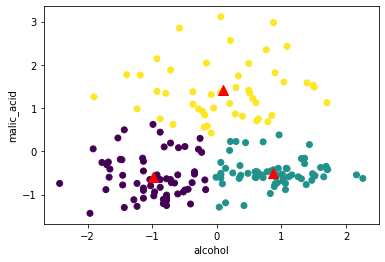

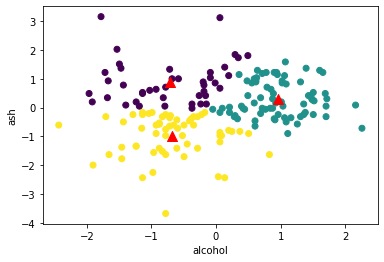

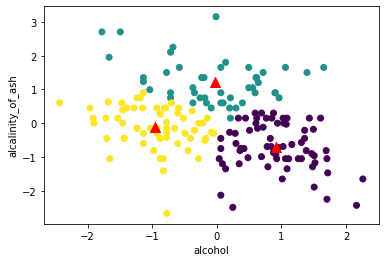

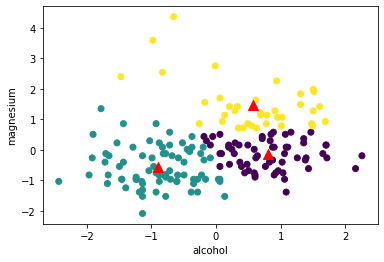

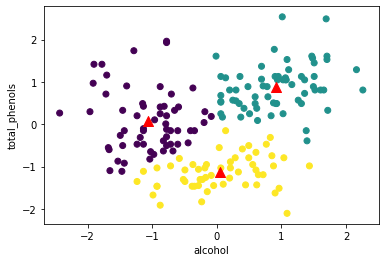

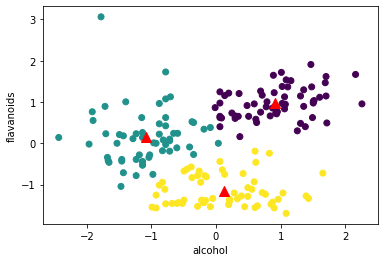

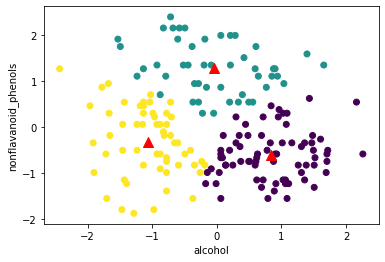

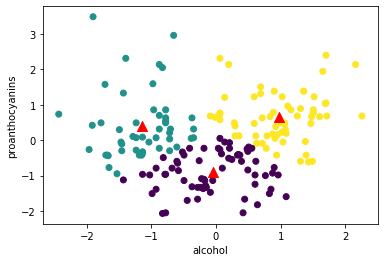

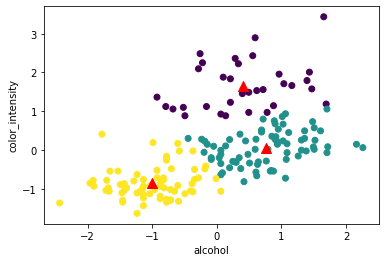

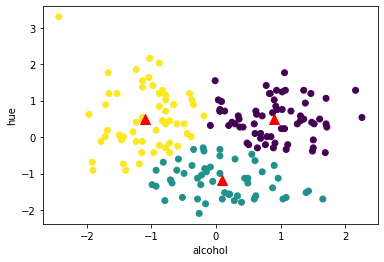

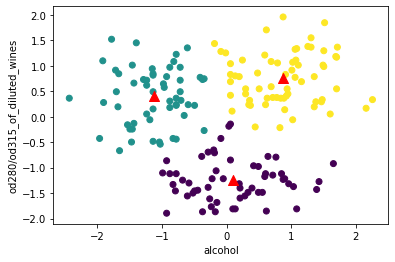

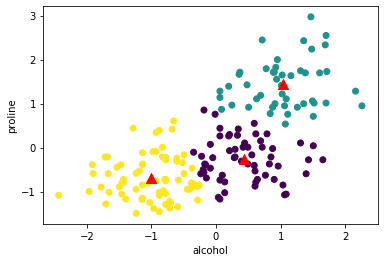

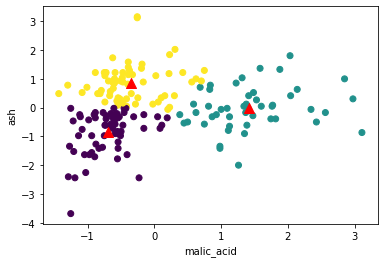

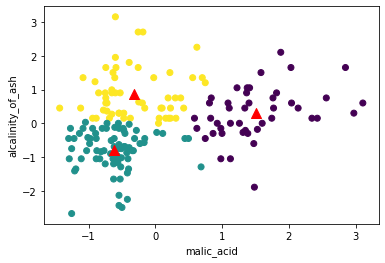

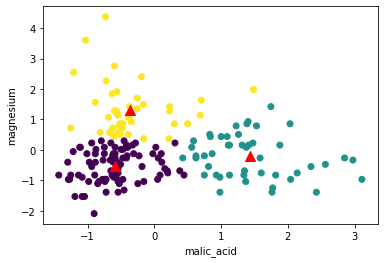

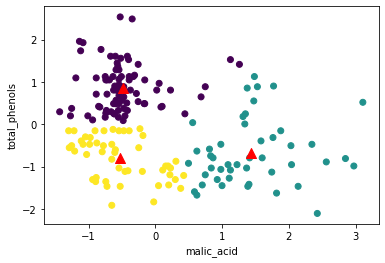

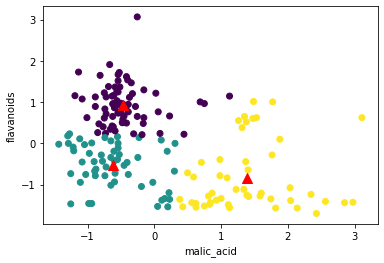

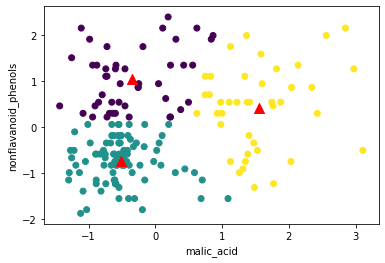

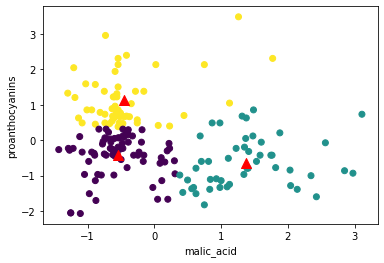

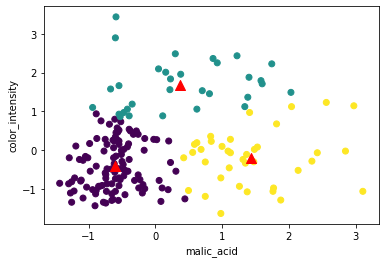

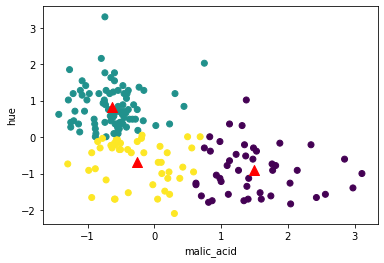

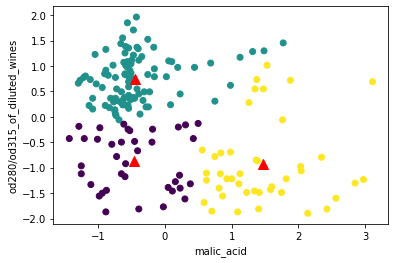

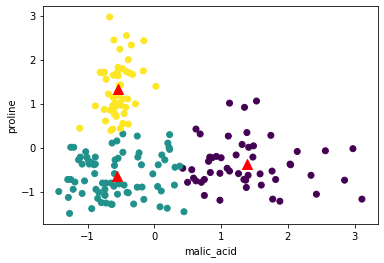

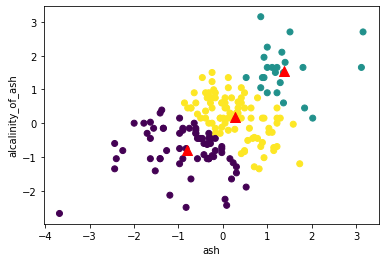

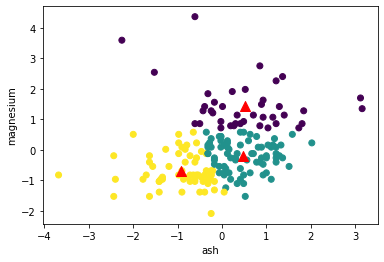

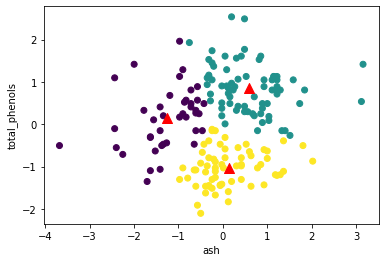

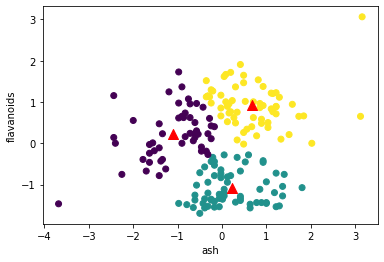

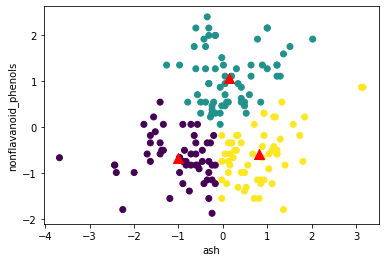

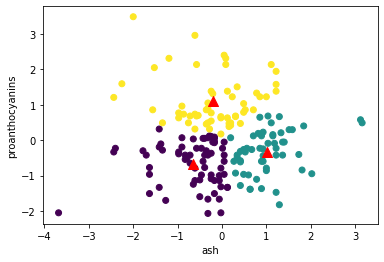

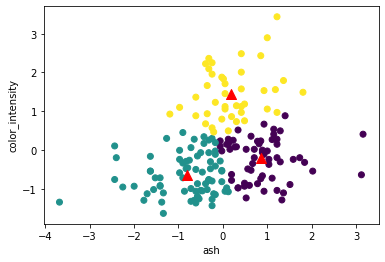

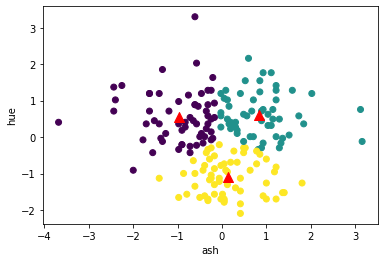

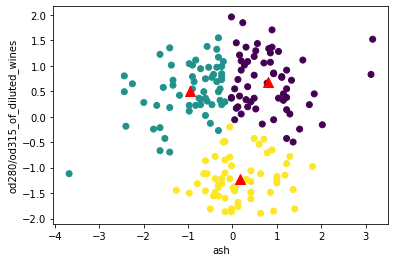

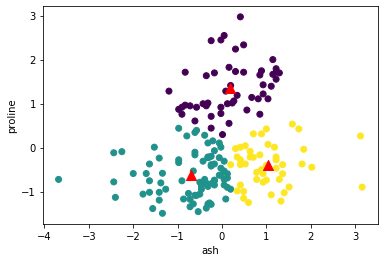

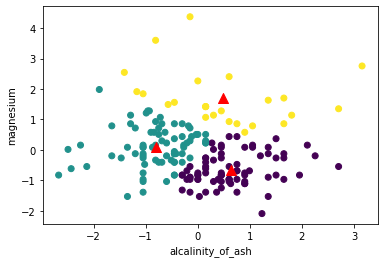

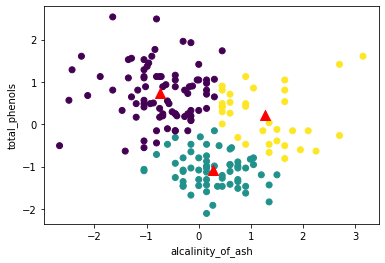

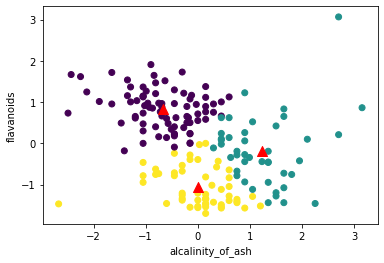

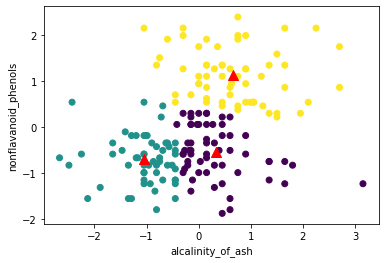

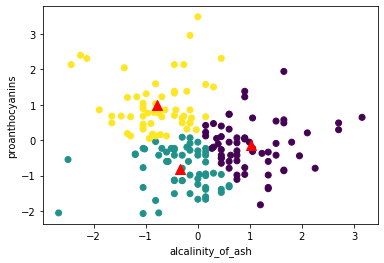

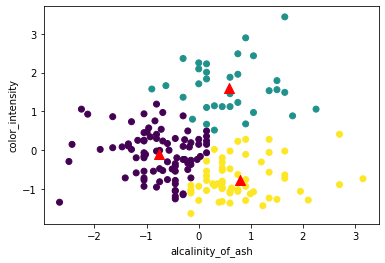

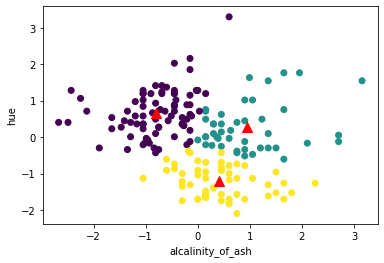

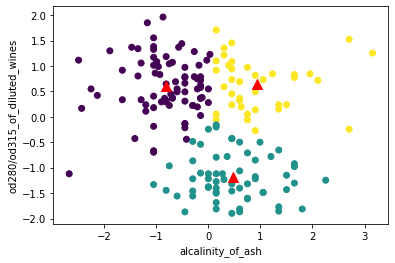

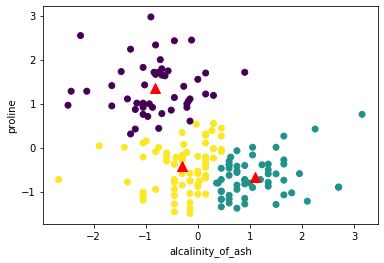

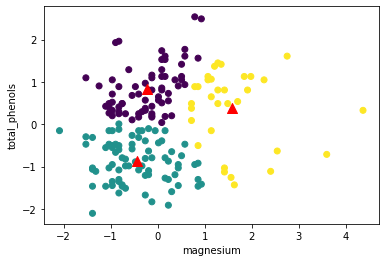

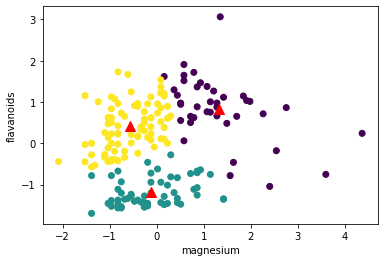

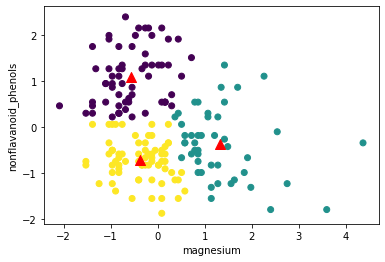

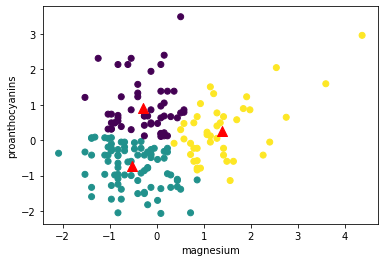

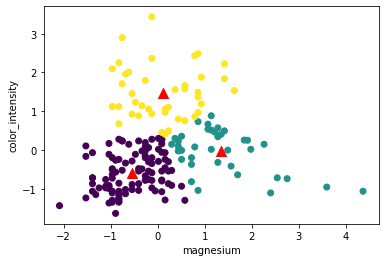

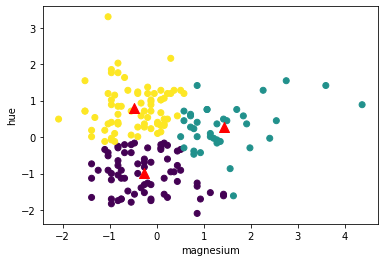

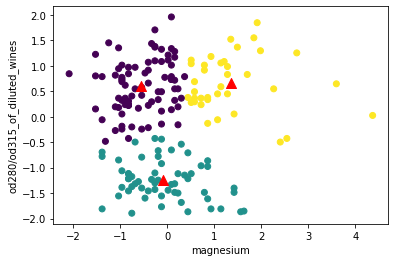

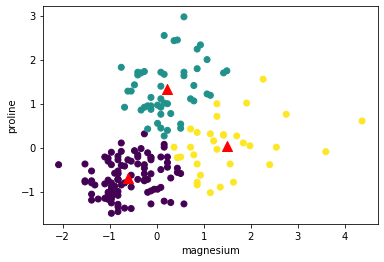

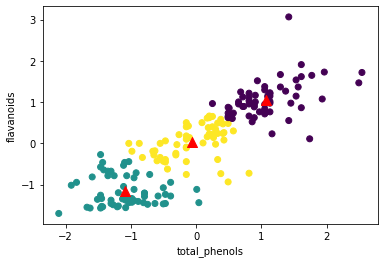

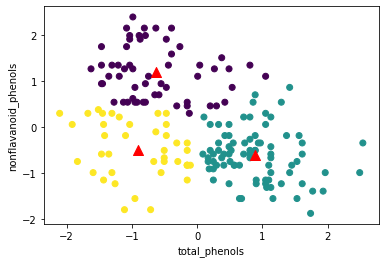

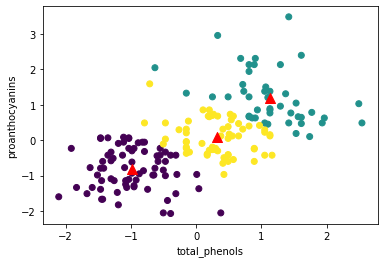

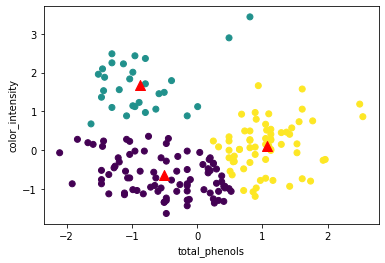

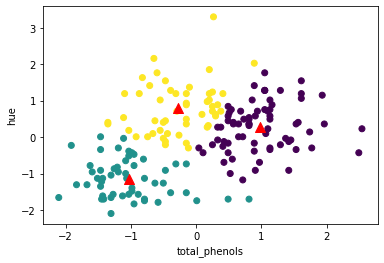

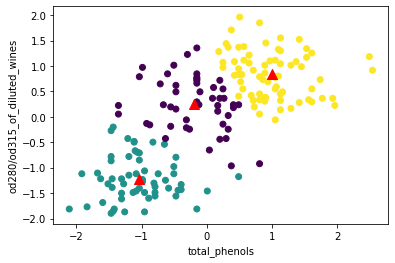

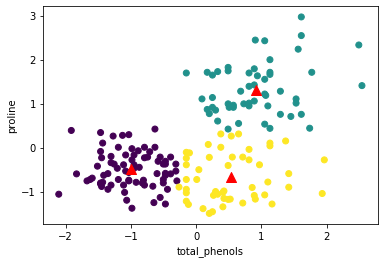

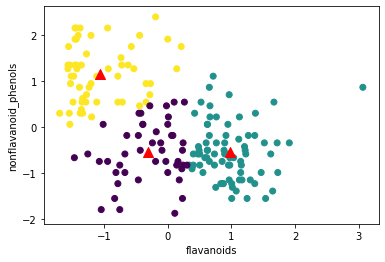

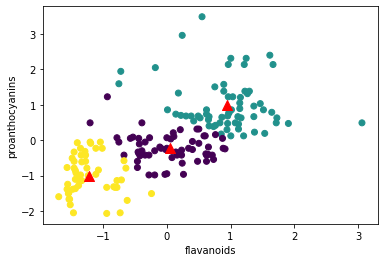

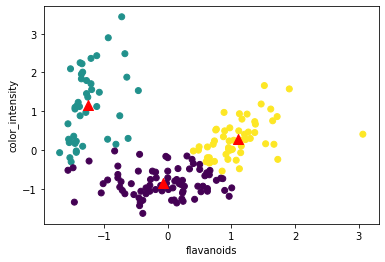

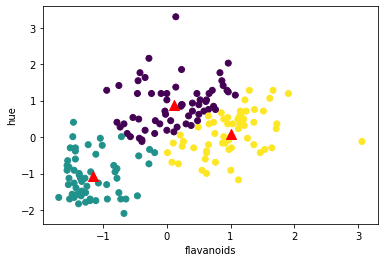

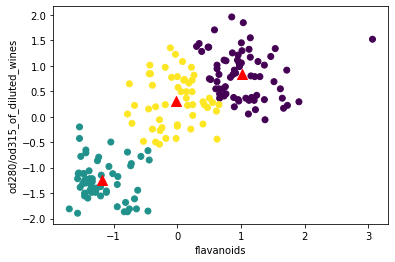

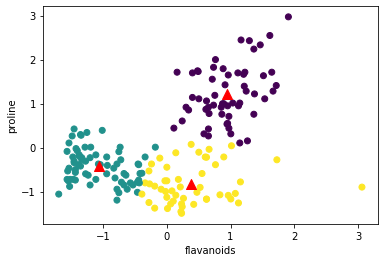

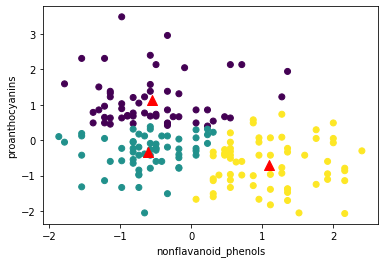

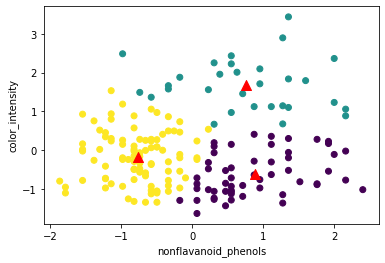

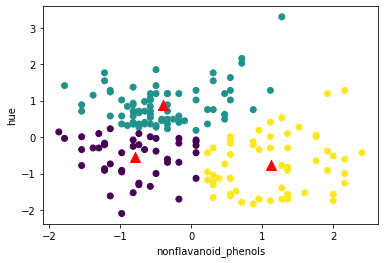

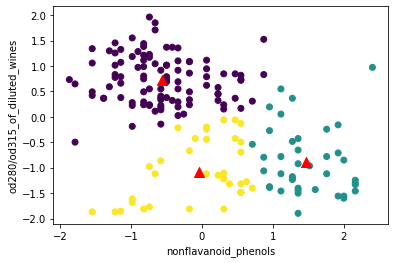

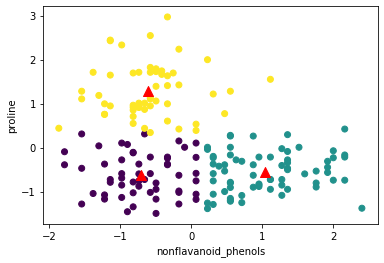

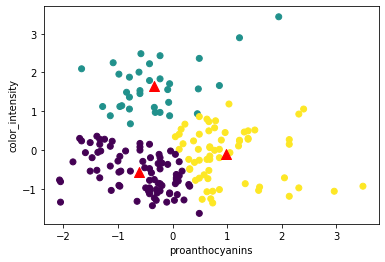

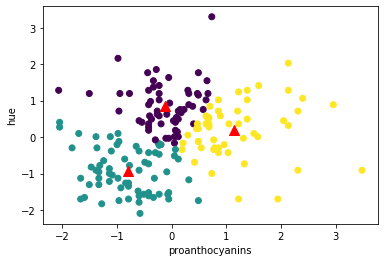

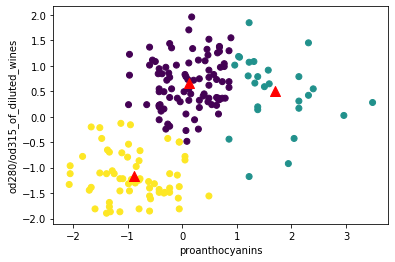

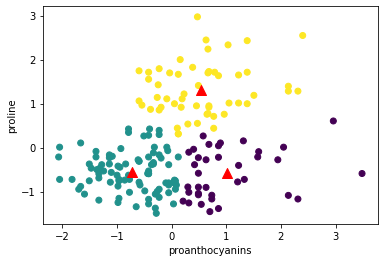

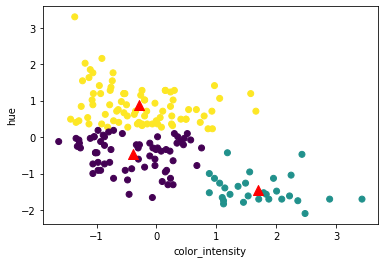

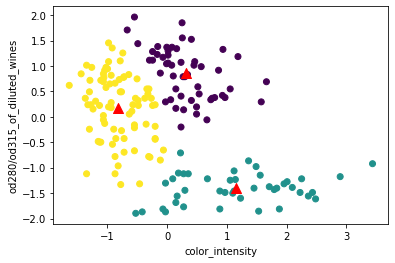

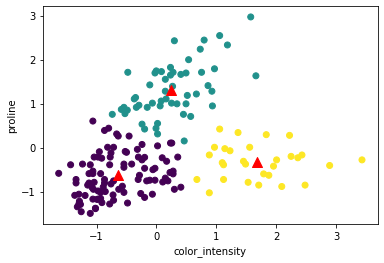

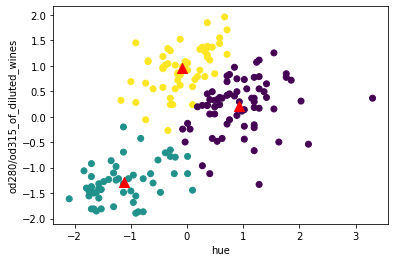

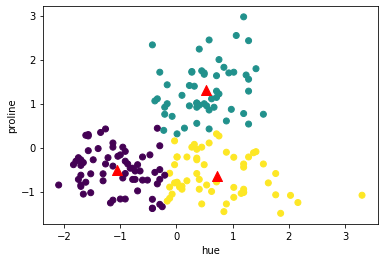

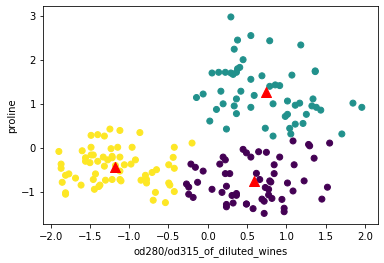

In [177]:
see_all_clusters(3)

Para encontrar o melhor numero de clusters, podemos utilizar o método cotovelo, escolhendo o numero de clusters de A de acordo com a quantidade que produz uma inercia que, em comparação com a inercia do numero de clusters inferior a A (numero de clusters de A - 1), possui uma baixa diminuição na inercia em comparação com a inercia dos modelos com diferentes numeros de clusters

In [178]:
def metodo_cotovelo(model, dataset, ks=10):
    result = {}
    for i in range(2,ks):
         kmeans = model(n_clusters=i)
         kmeans.fit(dataset)
         result[i] = (kmeans.inertia_)
    return result

In [183]:
#EXEMPLO
proline = np.array(X_norm['proline'])
color_intensity = np.array(X_norm['color_intensity'])
pro_color = np.c_[proline,color_intensity]

metodo_cotovelo(KMeans, pro_color)

{2: 184.16498764996868,
 3: 98.1272081665478,
 4: 71.31110252520915,
 5: 54.83615692065044,
 6: 46.01805897543768,
 7: 38.97420316848432,
 8: 33.25645001737113,
 9: 30.234849591325787}

Nesse caso, 3 clusters apontam serem melhores.

# Clusterização Hierarquica

In [181]:
from sklearn.cluster import AgglomerativeClustering

Vamos prosseguir com os dados normalizados para evitar o desbalanceamento, como na questão anterior.

In [184]:
#WARD
ward_clustering = AgglomerativeClustering(linkage='ward', distance_threshold=0, n_clusters=None).fit(pro_color)

#COMPLETE
complete_clustering = AgglomerativeClustering(linkage='complete', distance_threshold=0, n_clusters=None).fit(pro_color)

#AVERAGE
average_clustering = AgglomerativeClustering(linkage='average', distance_threshold=0, n_clusters=None).fit(pro_color)

#SINGLE
single_clustering = AgglomerativeClustering(linkage='single', distance_threshold=0, n_clusters=None).fit(pro_color)

In [185]:
from scipy.cluster.hierarchy import dendrogram
import numpy as np

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

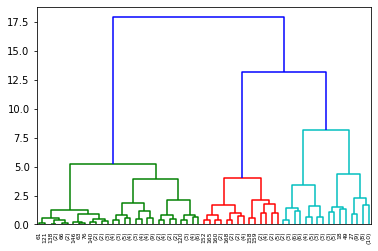

In [189]:
#WARD
plot_dendrogram(ward_clustering, truncate_mode='level', p=5)

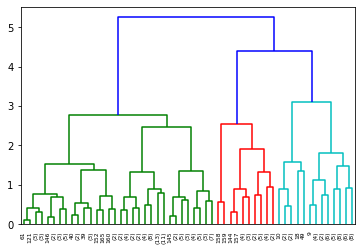

In [188]:
#COMPLETE
plot_dendrogram(complete_clustering, truncate_mode='level', p=5)

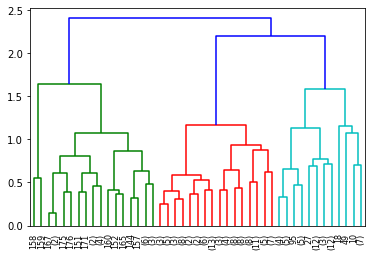

In [192]:
#AVERAGE
plot_dendrogram(average_clustering, truncate_mode='level', p=5)

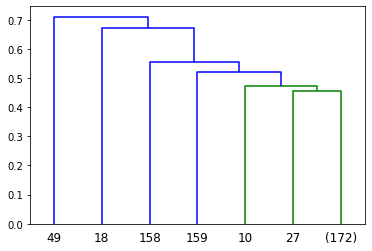

In [193]:
#SINGLE
plot_dendrogram(single_clustering, truncate_mode='level', p=5)

Os diversos tipos de clusterização hierarquica formaram 3 clusters (menos a Single), conforme o previsto no KMeans. 